Bibliografía: [GeeksForGeeks](https://www.geeksforgeeks.org/deep-learning/cifar-10-image-classification-in-tensorflow/).

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Parte 1

In [16]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Entrenamiento: ", x_train.shape, y_train.shape, "\nPrueba: ", x_test.shape, y_test.shape)

Entrenamiento:  (50000, 32, 32, 3) (50000, 1) 
Prueba:  (10000, 32, 32, 3) (10000, 1)


In [17]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

"""
Reducimos la cantidad de pixeles de las imágenes de 1-256 a 0-1.
Lo que permite al modelo seguir las tendencias y mejorar el entrenamiento.

Luego aplicamos la función `flatten()` para aplanar las etiquetas.
En otras palabras, convertimos las etiquetas de un formato de matriz 
2D a un formato de vector 1D.
"""

'\nReducimos la cantidad de pixeles de las imágenes de 1-256 a 0-1.\nLo que permite al modelo seguir las tendencias y mejorar el entrenamiento.\n\nLuego aplicamos la función `flatten()` para aplanar las etiquetas.\nEn otras palabras, convertimos las etiquetas de un formato de matriz \n2D a un formato de vector 1D.\n'

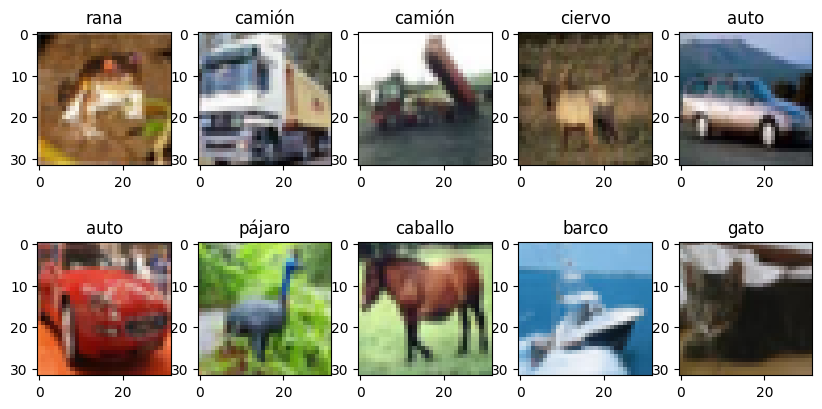

In [18]:
# Class names
class_names = ["avión", "auto", "pájaro", "gato", "ciervo",
               "perro", "rana", "caballo", "barco", "camión"]

# Show example images with classes
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
plt.show()


# Parte 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import time

# ANN
model = Sequential([
    Flatten(input_shape=(32,32,3)),      # 32*32*3 -> 3072
    Dense(256, activation="relu"),       # Capa densa ReLU
    Dense(128, activation="relu"),       # Capa densa ReLU
    Dense(10, activation="softmax")      # Salida para 10 clases softmax
])

model.compile(optimizer=Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


/home/dandelion/Documentos/Data Science/Labs/Lab4/.venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
E0000 00:00:1755908919.405174   36841 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1755908919.412910   36841 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Medir tiempo de entrenamiento
start_time = time.time()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)

end_time = time.time()
training_time = end_time - start_time
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3298 - loss: 1.8613 - val_accuracy: 0.3539 - val_loss: 1.7599
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4004 - loss: 1.6759 - val_accuracy: 0.4199 - val_loss: 1.6413
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4291 - loss: 1.5985 - val_accuracy: 0.4174 - val_loss: 1.6350
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4466 - loss: 1.5479 - val_accuracy: 0.4390 - val_loss: 1.5756
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4603 - loss: 1.5084 - val_accuracy: 0.4607 - val_loss: 1.5296
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4723 - loss: 1.4766 - val_accuracy: 0.4739 - val_loss: 1.4706
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4798 - loss: 1.4543 - val_accuracy: 0.4589 - val_loss: 1.5163
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4926 - loss: 1.4228 - val_accuracy: 0.

El modelo utilizado fue una Red Neuronal Totalmente Conectada de 2 capas densas con la función de activación ReLU y una capa de salida de 10 clases con la función softmax. El modelo realizó una predicción de 10 épocas de ~5s cada una, para un total de 56s de entrenamiento.

Las épocas del modelo presentan una mejora en la exactitud del entrenamiento pasando de 0.33 en la primera a 0.50 en la última y un decrecimiento en la pérdida del entrenamiento pasando de 1.86 a 1.39.